## Analysis of a car sell record Dataset

We have been provided with a car sell record dataset. In this dataset, we have thounds of car sell records.

The structure of this dataset is represented in the header shown below.

name
year
selling_price
km_driven
fuel
seller_type
transmission
Owner

| name | year | selling_price | km_driven| fuel | seller_type | transmission | Owner |

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |   
    
#### Description of Fields

* __name__ - detail car type of the sold car
* __year__ - Year of the car when it was bought
* __selling_price__ - Price at which the car is being sold
* __km_driven__ - Number of Kilometres the car is driven
* __fuel__ - Fuel type of car (petrol / diesel / CNG / LPG / electric)
* __seller_type__ - Tells if a Seller is Individual or a Dealer
* __transmission__ - Gear transmission of the car (Automatic/Manual)
* __owner__ - Number of previous owners of the car.

There are four questions to explore with the data as shown below.


In [ ]:
your_name = "Isidora Gautier"
your_student_id = "48622613"


1. I used the GENAI tool, i.e., ChatGPT, to check the grammar in the analysis part.

In [3]:
# libraries you might need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

car= pd.read_csv('car_sell.csv', index_col=0) #Read the CSV file and eliminate the index colum.
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007.0,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007.0,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012.0,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017.0,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014.0,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
car.shape

(4340, 8)

 ## Q1. Remove missing data

Please remove the records that match ANY of the below two conditions in the csv file:

 * year is missing
 * fuel is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [6]:
car.head() # Take a look to the column names 

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007.0,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007.0,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012.0,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017.0,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014.0,450000,141000,Diesel,Individual,Manual,Second Owner


In [7]:
# Create a variable that sum the null values that are in each column
missing_count = car.isnull().sum() 
print("Missing values per column:\n",missing_count)

Missing values per column:
 name               0
year             310
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
dtype: int64


In [8]:
# Now I will remove these Null Values and i will create a new dataframe with the cleaned data.
car1 = car.dropna()
missing_count_2=car1.isnull().sum() # check if i still have null values
print("Missing values per column:\n",missing_count_2)

Missing values per column:
 name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


In [9]:
# Check the unique values for year and fuel
car1['year'].unique()
# as all of them are values I will not delete any

array([2007., 2012., 2017., 2014., 2016., 2015., 2018., 2019., 2013.,
       2011., 2010., 2009., 2006., 2005., 2008., 2004., 1998., 2002.,
       2020., 2003., 2000., 1999., 2001., 1995., 1997., 1996., 1992.])

In [10]:
car1['fuel'].unique()
# Check how many rows have the 'none' value
car1[car1['fuel']=='none'].shape[0]


144

In [11]:
car2=car1[car1['fuel']!='none']
# I will drop the 'none' fuel types and check how many rows I have left
print(car.shape)
print(car2.shape) # I droped 454 rows

(4340, 8)
(3886, 8)


### Q1 comments
1. The data frame originally has 4340 rows and 8 columns
2. I dropped 310 rows as the year has Null
3. I dropped 144 rows as the fuel was 'none'
4. My new dataframe named car2 has 3886 rows and 8 columns

## Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique name, unique seller_type, unique transmission, and unique owner
* Q2.2 descriptive statistics, including the total number, mean, std, min and max regarding all km_driven
* Q2.3 descriptive statistics, including mean, std, max, and min of the number of selling_price grouped by different seller_type
* Q2.4 descriptive statistics, including mean, std, max, min of the number of years that sold by each owner type


1. **Q2.1 total number of unique name, unique seller_type, unique transmission, and unique owner**

In [29]:
#with nunique() function I can count the number of unique values in the column I selected
unique_name_count=car2['name'].nunique()
unique_seller_type_count=car2['seller_type'].nunique()
unique_transmission_count=car2['transmission'].nunique()
unique_owner_count=car2['owner'].nunique()

print("Total number of unique names:", unique_name_count)
print("Total number of unique seller types:", unique_seller_type_count)
print("Total number of unique transmissions:", unique_transmission_count)
print("Total number of unique owners:", unique_owner_count)

Total number of unique names: 1402
Total number of unique seller types: 3
Total number of unique transmissions: 2
Total number of unique owners: 5


2. **Q2.2 descriptive statistics, including the total number, mean, std, min and max regarding all km_driven**

In [67]:
print('Table 1: KM Driven Statistics')
car2['km_driven'].describe()
#describe function gives me all the statistics needed

Table 1: KM Driven Statistics


count      3886.000000
mean      66313.279207
std       46679.603916
min           1.000000
25%       35000.000000
50%       60000.000000
75%       90000.000000
max      806599.000000
Name: km_driven, dtype: float64

3. **Q2.3 descriptive statistics, including mean, std, max, and min of the number of selling_price grouped by different seller_type**e

In [69]:
print('Table 2: Selling Price Statistics per Seller Type')
car2.groupby('seller_type')['selling_price'].describe()
#I used groupby function to group the different sellers and then describe statistics for the selling price

Table 2: Selling Price Statistics per Seller Type


,count,mean,std,min,25%,50%,75%,max
seller_type,,,,,,,,
Dealer,889.0,702093.314961,813597.811832,22000.0,300000.0,490000.0,746000.0,8900000.0
Individual,2903.0,421169.410265,420273.684129,20000.0,170000.0,300000.0,540000.0,4800000.0
Trustmark Dealer,94.0,935797.872340,655724.299195,315000.0,625000.0,750000.0,760000.0,2600000.0


4. **Q2.4 descriptive statistics, including mean, std, max, min of the number of years that sold by each owner type**

In [71]:
print('Table 3: Year statistics by Owner Type')
car2.groupby('owner')['year'].describe()
#I used groupby function to group the different sellers and then describe statistics for the selling price

Table 3: Year statistics by Owner Type


,count,mean,std,min,25%,50%,75%,max
owner,,,,,,,,
First Owner,2532.0,2014.453791,3.555597,1996.0,2012.00,2015.0,2017.0,2020.0
Fourth & Above Owner,67.0,2007.238806,5.248635,1992.0,2004.00,2008.0,2010.5,2020.0
Second Owner,1000.0,2010.977000,3.840993,1995.0,2009.00,2011.5,2014.0,2019.0
Test Drive Car,14.0,2019.642857,0.633324,2018.0,2019.25,2020.0,2020.0,2020.0
Third Owner,273.0,2009.413919,3.920266,1997.0,2007.00,2010.0,2012.0,2019.0


## Q3. Plotting and Analysis

Please try to explore the correlation between fuel/year/seller_type/transmission/owner and selling_price; for instance, do First Owner cars tend to sell higher prices than second owner cars? Hint: you may use the boxplot function to plot figures for comparison
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you are required to provide an overall summary of your findings from the plots you generated.

### Selling Price vs Fuel Type Analysis

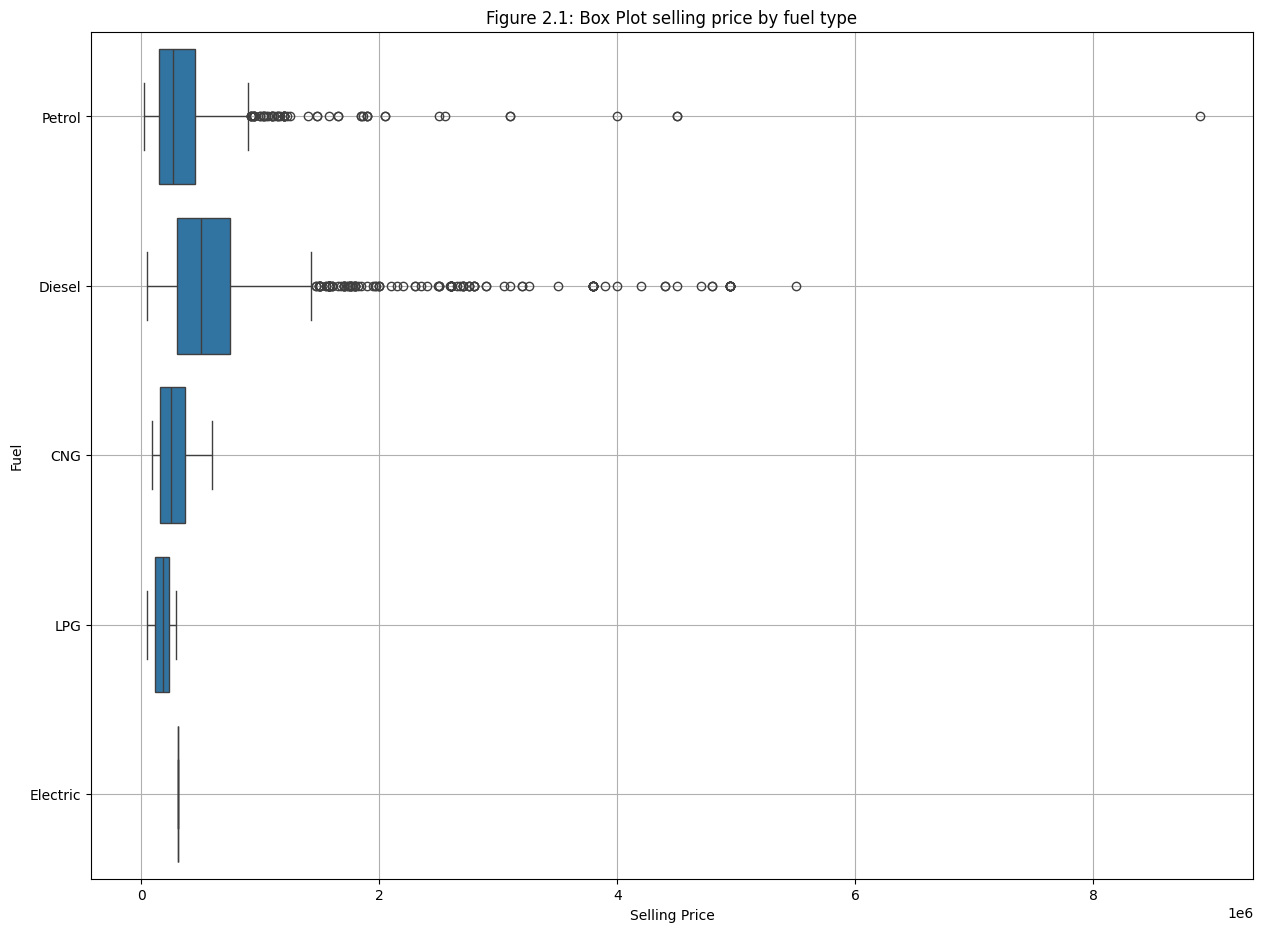

In [168]:
import seaborn as sns
plt.figure(figsize=(15,11))
sns.boxplot(x='selling_price', y='fuel', data=car2,orient="h")

plt.title('Figure 2.1: Box Plot selling price by fuel type')
plt.xlabel('Selling Price')
plt.ylabel('Fuel')
plt.grid()
plt.show()

In [166]:
print('Table 3: Year statistics by Owner Type')
car2.groupby('fuel')['selling_price'].describe() # To check the descriptive statistics as numbers.

Table 3: Year statistics by Owner Type


,count,mean,std,min,25%,50%,75%,max
fuel,,,,,,,,
CNG,34.0,281617.558824,150305.142064,88000.0,160000.0,247500.0,365000.00,595000.0
Diesel,1919.0,656727.952579,664510.179099,45000.0,300000.0,500000.0,750000.00,5500000.0
Electric,1.0,310000.000000,NaN,310000.0,310000.0,310000.0,310000.00,310000.0
LPG,20.0,171999.950000,71070.714970,50000.0,115000.0,180000.0,232499.25,290000.0
Petrol,1912.0,345813.189331,374759.997473,20000.0,150000.0,265000.0,450000.00,8900000.0


Findings from Figure 2.1: Box Plot of Selling Price by Fuel Type:

1. Diesel has the highest median, indicating that Diesel cars tend to have higher selling prices compared to other fuel types.
2. Both Petrol and Diesel exhibit outliers, suggesting that some cars are sold at prices significantly above the upper limit (calculated as Q3 + 1.5 * IQR). These outliers could represent premium or luxury cars.
3. The highest selling price among all fuel types appears in the Petrol category, which is an outlier.
4. LPG cars have the lowest median, suggesting they tend to have lower selling prices. However, it's important to note that there are only 20 LPG cars sold compared to approximately 1,900 Diesel and Petrol cars, so this finding might not be representative.
5. Diesel shows more variability in prices, as indicated by the larger box compared to other fuel types.
5. Electric cars are the least popular in this dataset, with only one sale recorded. The selling price for this electric car falls within the IQR of other fuel types, indicating it is not an outlier.

**Conclusion:**

- Diesel cars tend to have higher selling prices, while LPG cars generally sell for less.
- Diesel and Petrol cars have a wider range and IQR, indicating greater variability in their selling prices.

### Selling Price vs Year Analysis

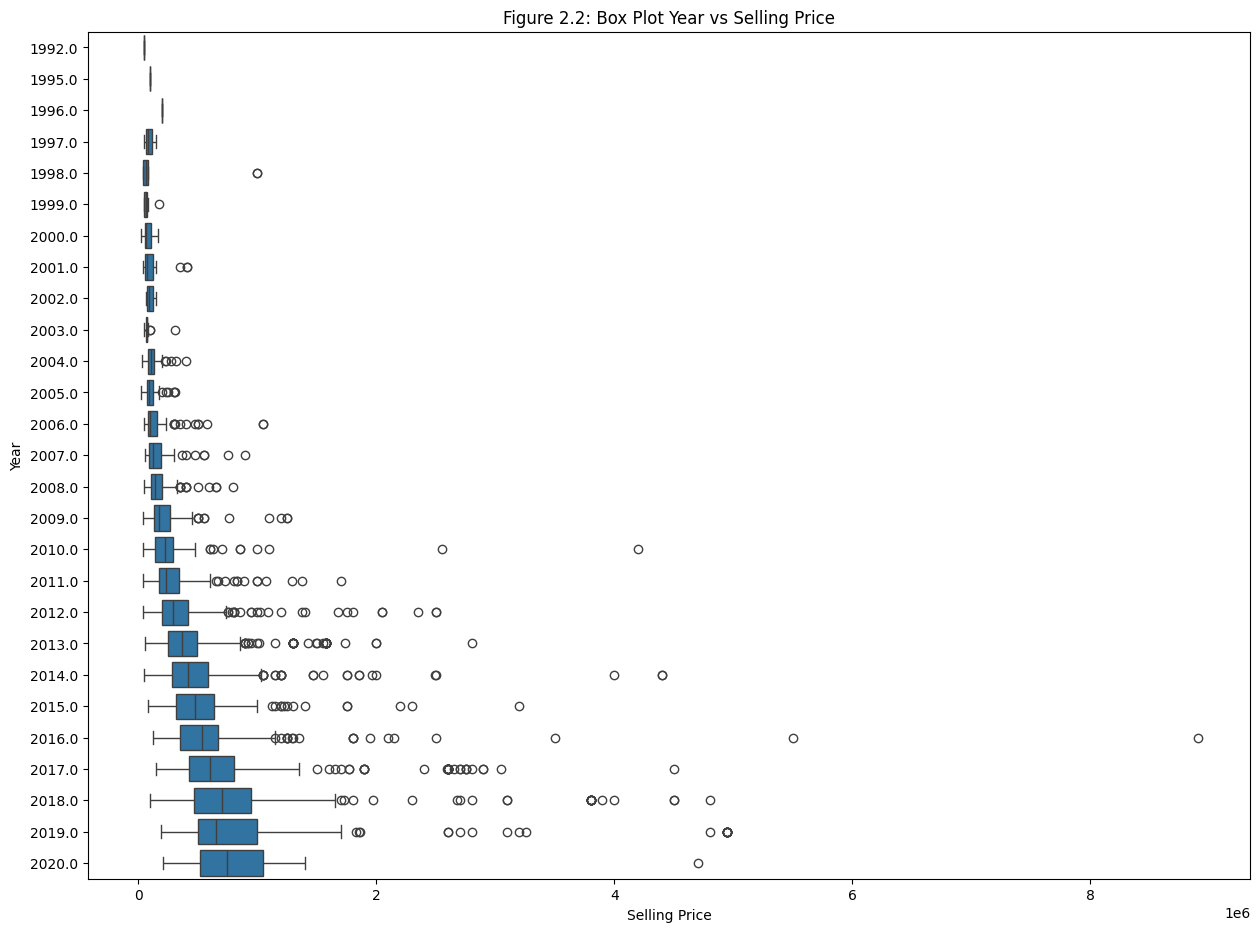

In [171]:
import seaborn as sns
plt.figure(figsize=(15,11))
sns.boxplot(x='selling_price', y='year', data=car2,orient="h")

plt.title('Figure 2.2: Box Plot Year vs Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Year')
plt.show()

Findings from Figure 2.2: Box Plot of Year vs. Selling Price:

1. There appears to be a positive correlation between the year the car was sold and its selling price. The median selling price tends to increase in more recent years.
2. As the year of sale increases, the variability in selling prices also increases.
3. Cars sold in 2020 show significantly fewer outliers compared to previous years. This could be due to the impact of the pandemic, where there was less demand for luxury or expensive cars as people were restricted from going out.

**Conclusion:**

- The selling price of cars tends to be higher in more recent years, suggesting that car prices may be increasing over time.

### Selling Price vs Seller Type Analysis

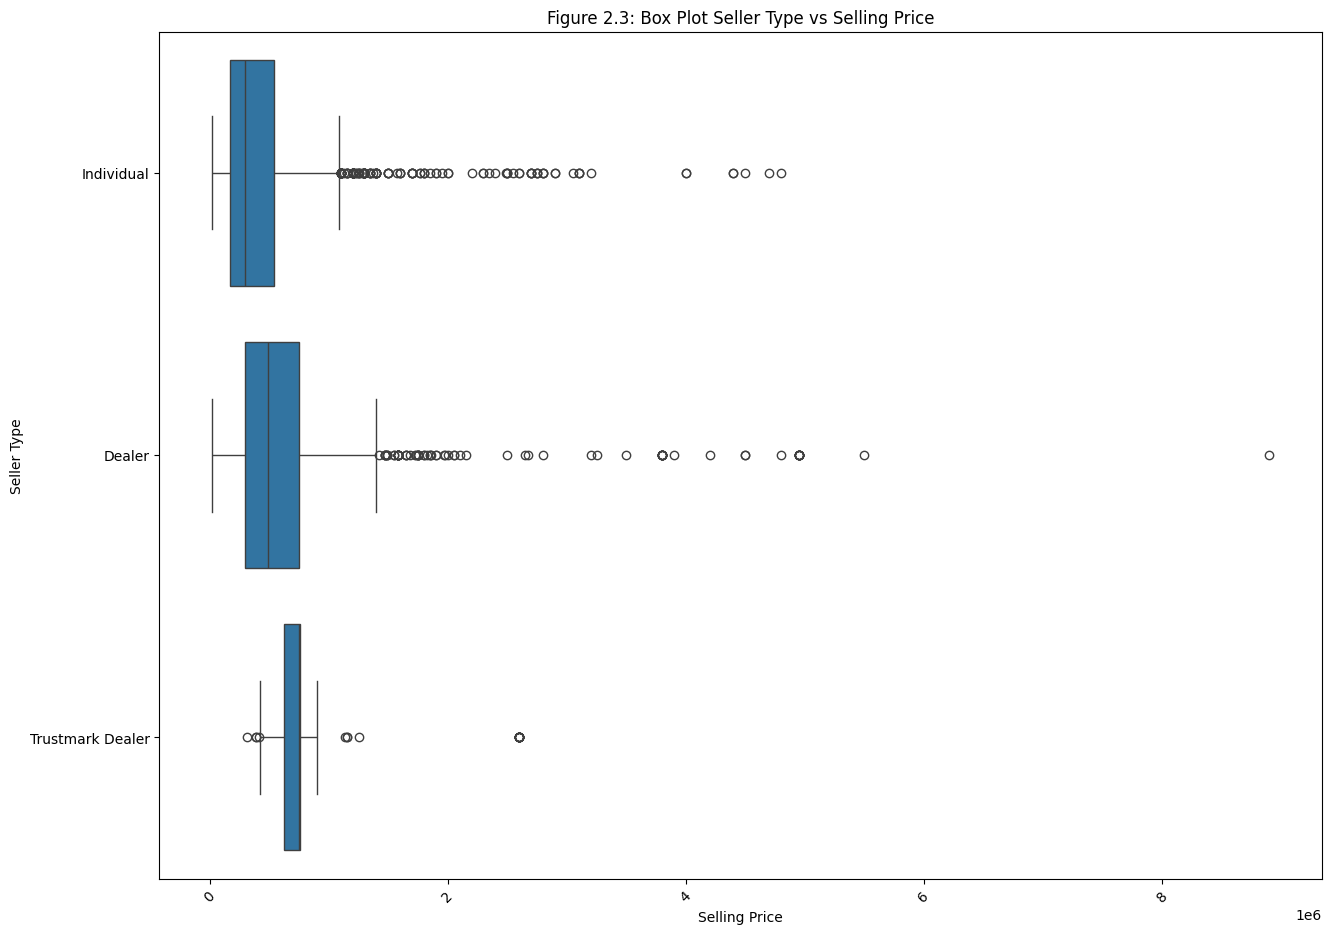

In [117]:
import seaborn as sns
plt.figure(figsize=(15,11))
sns.boxplot(x='selling_price', y='seller_type', data=car2,orient="h")

plt.title('Figure 2.3: Box Plot Seller Type vs Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Seller Type')
plt.show()

Findings from Figure 2.3: Box Plot of Seller Type vs. Selling Price:

1. Individual sellers have the lowest median selling price, indicating that prices tend to be lower compared to those of dealers and Trustmark dealers.
2. Dealers have a larger IQR (interquartile range), indicated by the bigger blue box, which suggests that prices are more variable compared to other seller types.
3. For Trustmark dealers, the median price is close to Q3. This might suggest that while most cars are priced within a narrow, higher range, there are a few extremely expensive cars that pull the upper quartile closer to the median. (I confirmed the median's position by checking the descriptive statistics since it's not clearly visible in the plot.)

**Conclusion:**

- The selling price of cars tends to be highest for Trustmark dealers, followed by dealers, with the lowest prices offered by individual sellers.


### Selling Price vs Transmission Analysis

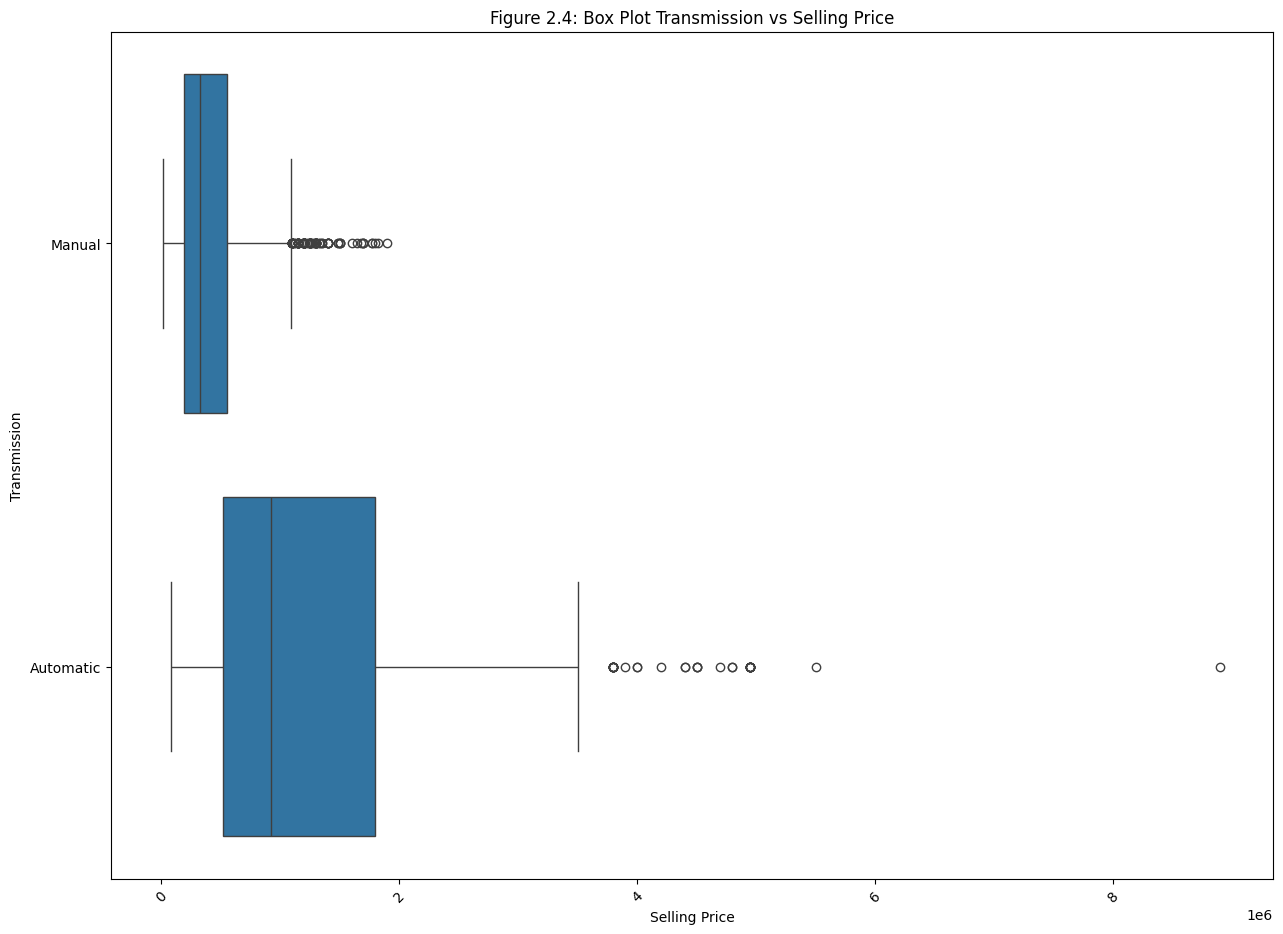

In [119]:
import seaborn as sns
plt.figure(figsize=(15,11))
sns.boxplot(x='selling_price', y='transmission', data=car2,orient="h")

plt.title('Figure 2.4: Box Plot Transmission vs Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Transmission')
plt.show()

Findings from Figure 2.4: Box Plot of Transmission vs. Selling Price:
1. Manual cars tend to be cheaper than Automatic cars. The outlier prices for Manual cars are almost all within the IQR of Automatic cars, indicating that even the most expensive Manual cars are still cheaper than the 25% most expensive Automatic cars.
2. Automatic cars exhibit greater price variance, possibly because they are more popular and available in a wider range of models, including both budget and luxury options.
3. For Automatic cars, the median is closer to Q1, and there are spread-out outliers. This suggests a right-skewed distribution where most Automatic cars are priced lower, but there are some extremely high-priced models, likely due to the presence of more luxurious vehicles in this category.

**Conclusion:**

- Transmission type significantly impacts selling price: Automatic cars generally have higher prices and greater variability, likely due to their popularity and the inclusion of more luxury models.
- Manual cars, on the other hand, are typically cheaper and have less price variation. The skewness in the Automatic car prices reflects the diversity within this category, ranging from affordable to high-end luxury vehicles.

### Selling Price vs Owner Analysis

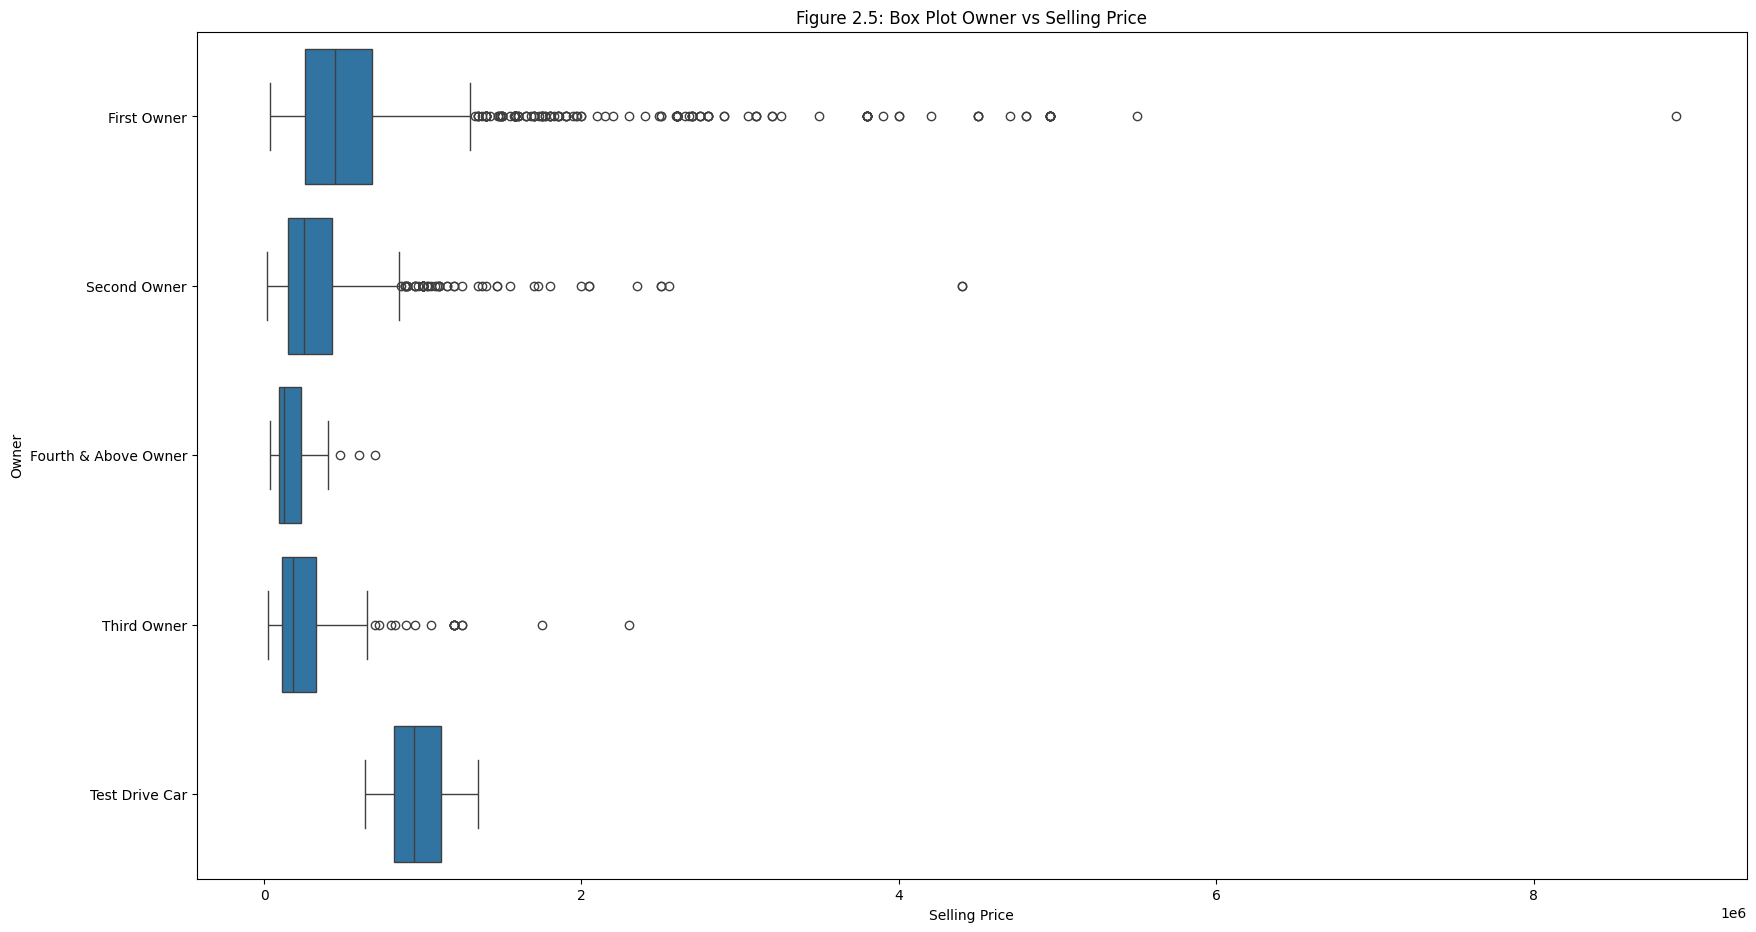

In [162]:
import seaborn as sns
plt.figure(figsize=(20,11))
sns.boxplot(x='selling_price', y='owner', data=car2,orient="h")

plt.title('Figure 2.5: Box Plot Owner vs Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Owner')
plt.show()

Findings from Figure 2.5: Box Plot of Owner vs. Selling Price:

1. There appears to be a negative correlation between the selling price and the number of previous owners. 2. The median selling price decreases as the number of previous owners increases. This could be due to higher mileage with more owners and the perception that a car with fewer owners is better maintained.
3. For cars sold by the fourth owner and above, there are fewer outliers compared to those sold by fewer owners. This might be because the value of the car decreases as it ages, and buyers may care less about the brand or model.
4. Test drive cars have the highest prices, likely because they have only a few kilometers on them. Additionally, since they are sold by brand dealers, their prices are more regulated, leading to fewer or no outliers.

**Conclusion:**

- The selling price tends to decrease with an increasing number of previous owners, likely due to higher mileage and concerns about maintenance.
- Cars sold by multiple owners (fourth owner and above) tend to have more consistent prices with fewer outliers, possibly because their value has already significantly depreciated.
- Test drive cars command higher prices due to their low mileage and regulated pricing by brand dealers.







### **Overall Analysis Conclusion**:
This analysis suggests that factors such as fuel type, car age, seller type, transmission, and ownership history all play significant roles in determining a car's selling price. Buyers tend to pay a premium for Diesel fuel types, newer models, cars sold by reputable dealers, automatic transmissions, and vehicles with fewer previous owners. These insights can help in understanding market dynamics and in making informed decisions whether buying or selling cars.

## Q4. Detect and remove outliers

We define car sale records WITHOUT following ANY of the below three rules as outliers:

1. owner to be first, second and third owner only
2. Fuel to be Diesel or Petrol only
3. Seller_type to be dealer or individual only

Please remove the corresponding records in the csv file that is not qualified with the rules. After that, __print the length of the data__.

In [227]:
# Here im creating different dataframes for each outlier cleaning according with the instructions.
#Car 3: DF with First and Second owner only
car3=car2[(car2['owner']=='First Owner') |
    (car2['owner']=='Second Owner')|
    (car2['owner']=='Third Owner')]

#Car 4: DF with Diesel and Petrol fuel type only
car4=car3[(car3['fuel']=='Diesel') |
    (car3['fuel']=='Petrol')]
#Car 5: DF with Individual and Dealer Seller Types only
car5=car4[(car4['seller_type']=='Individual') |
    (car4['seller_type']=='Dealer')]

print("Initial car dataframe size", car2.shape)
print("After removing Owner outliers car dataframe size",car3.shape)
print("After removing Fuel Outliers car dataframe size",car4.shape)
print("After removing seller typer Outliers and final car dataframe size",car5.shape)
# The final data frame has 3657 rows and 8 columns


['First Owner' 'Second Owner' 'Third Owner']
['Petrol' 'Diesel']
['Individual' 'Dealer']
Initial car dataframe size (3886, 8)
After removing Owner outliers car dataframe size (3805, 8)
After removing Fuel Outliers car dataframe size (3751, 8)
After removing seller typer Outliers and final car dataframe size (3657, 8)
